# Notebook 2 - Network Analysis for Evaluators in Ecosystems
### MIT Global Ecosystems Dynamics Initiative

This notebook develops an analysis of the studied Ecosystems, focused in particular towards the *evaluator organizations*; this means, the organizations which responded the survey, i.e. the measuring instrument of the the study conducted by GED. 


### Part 1: Packages

First we import the packages we will use later on to
*  study our ecosystems as NetworkX graphs
*  conduct analysis by using panda DataFrames
*  using numpy and statistical tools 
*  using visualization tools such as heatmaps through `seaborn`

In [1]:
import pandas as pd
import numpy as np 
import networkx as nx
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Part 2: Reading of Data form GED

We read the data from each of our ecosystems. This data comes from a series of studies conducted by GED. 

In [2]:
#----------------
# CSVs: nodes 
#----------------
ags_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi AGS Stats.csv')             
caba_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi CABA Stats.csv')           #capital
cdmx_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi CDMX Stats.csv')           #capital
gdl_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi GDL Stats.csv') 
hgo_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Hidalgo Stats.csv')
mad_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Madrid Stats.csv')          #capital
mtv_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Montevideo Stats.csv')      #capital
oax_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Oaxaca Stats.csv')
sao_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Sao Paulo Stats.csv')       #capital
scl_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi SCL Stats.csv')             #capital
val_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Valencia Stats.csv')             #capital


#----------------
# CSVs: edges
#----------------
ags_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi AGS Edges.csv')
caba_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi CABA Edges.csv')           #capital
cdmx_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi CDMX Edges.csv')           #capital
gdl_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi GDL Edges.csv')
hgo_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Hidalgo Edges.csv')
mad_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Madrid Edges.csv')          #capital
mtv_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Montevideo Edges.csv')      #capital
oax_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Oaxaca Edges.csv')
sao_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Sao Paulo Edges.csv')       #capital
scl_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi SCL Edges.csv')             #capital
val_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Valencia Edges.csv')             #capital



#---------------------------------
# CSVs: evaluating organizations
#---------------------------------
eval_ags_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - AGS.csv')
eval_caba_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - CABA.csv')
eval_cdmx_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - CDMX.csv')
eval_gdl_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - GDL.csv')
eval_hgo_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - HGO.csv')
eval_mad_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - MAD.csv')
eval_mtv_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - MVD.csv')
eval_oax_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - OAX.csv')
eval_sao_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - SAO.csv')
eval_scl_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - SCL.csv')
#eval_val_csv = pd.read_csv('Ecosystems_from_GED/Gephi_evaluadores/Evaluadores ecosistemas - VAL.csv')


#This is, for example, the list of the names of the organizations that responded the survey in Buenos Aires, ARG
#list(eval_caba_csv['Label'])

### Part 3: Building of GraphMLs

In this part of the code, the imported data is processed into a GraphML object, 

In [3]:
def armar_grafo(nodes,edges,rol_str,weight_str):
    '''
    Function that builds a NetworkX graph from a list of nodes and connections.
    
    In:
    - nodes       node list
    - edges       edge list
    - rol_str     name of the parameter that describes an actor's role
    - weight_str  name of the parameter that describes an edge's weight
    
    Out:
    G, a NetworkX graph.
    '''
    
    # DiGraph from edge list
    G=nx.from_pandas_edgelist(edges,'Source','Target',edge_attr=["Weight"],create_using=nx.DiGraph())
    
    # rol is a dictionary: node id -> role
    rol = {nid: nodes[nodes['Id']==nid][rol_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,rol,'rol')
    
    # weight is a dictionary: node id -> weight
    weight = {nid: nodes[nodes['Id']==nid][weight_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,weight,'weight')
    
    return G

Now, we build all the graphs for our studied ecosystems by using the function `armar grafo` from above. 

In [4]:
#-----------------------
# Graph Construction
#-----------------------

ags_G=armar_grafo(ags_nd,ags_ed,'role','weight')
caba_G=armar_grafo(caba_nd,caba_ed,'type','weight')
cdmx_G=armar_grafo(cdmx_nd,cdmx_ed,'rol estimado','weight')
gdl_G=armar_grafo(gdl_nd,gdl_ed,'type','weight')
hgo_G=armar_grafo(hgo_nd,hgo_ed,'type','weight')
mad_G=armar_grafo(mad_nd,mad_ed,'rol estimado','weight')
mtv_G=armar_grafo(mtv_nd,mtv_ed,'rol estimado','node size')
oax_G=armar_grafo(oax_nd,oax_ed,'rol','weight')
sao_G=armar_grafo(sao_nd,sao_ed,'rol estimado','weight')
scl_G=armar_grafo(scl_nd,scl_ed,'type','weight')
val_G=armar_grafo(val_nd,val_ed,'type','weight')

We proceed to restrict each of the studied networks/ecosystems when they are restricted to their evaluators. After that, we count how many evaluators there are in each corresponding city.

In [5]:
#----------------------------------
# Graphs Restricted to evaluators
#----------------------------------

eval_ags_G = ags_G.subgraph(list(eval_ags_csv['Label']))
eval_caba_G = caba_G.subgraph(list(eval_caba_csv['Label']))
eval_cdmx_G = cdmx_G.subgraph(list(eval_cdmx_csv['Label']))
eval_gdl_G = gdl_G.subgraph(list(eval_gdl_csv['Label']))
eval_hgo_G = hgo_G.subgraph(list(eval_hgo_csv['Label']))
eval_mad_G = mad_G.subgraph(list(eval_mad_csv['Label']))
eval_mtv_G = mtv_G.subgraph(list(eval_mtv_csv['Label']))
eval_oax_G = oax_G.subgraph(list(eval_oax_csv['Label']))
eval_sao_G = sao_G.subgraph(list(eval_sao_csv['Label']))
eval_scl_G = scl_G.subgraph(list(eval_scl_csv['Label']))

#eval_ags_G.nodes(data=True)
#eval_caba_G.nodes(data=True)

In [6]:
#counting how many evaluators in each city

eval_graphs = {'Aguascalientes' : eval_ags_G,
              'Buenos Aires' : eval_caba_G,
              'Ciudad de México' : eval_cdmx_G,
              'Guadalajara' : eval_gdl_G,
              'Hidalgo' : eval_hgo_G,
              'Madrid' : eval_mad_G,
              'Montevideo' : eval_mtv_G,
              'Oaxaca' : eval_oax_G,
              'Sao Paulo' : eval_sao_G,
              'Santiago de Chile' : eval_scl_G}

for city, subgraph in eval_graphs.items():
    print(city + ': ' + str(len(list(subgraph.nodes()))))
    print('')
    

Aguascalientes: 19

Buenos Aires: 31

Ciudad de México: 36

Guadalajara: 32

Hidalgo: 19

Madrid: 37

Montevideo: 48

Oaxaca: 36

Sao Paulo: 28

Santiago de Chile: 25



### Part 4: Attribute Mixing Matrices

In this part we obtain the attribute mixing matrices corresponding to each of the evaluator sub-ecosystems. For each pair $(r_{1}, r_{2})$ of roles in the following list:
*  Knowledge Generator
*  Enabler
*  Promoter
*  Linker
*  Articulator
*  Community

We answer the query: *What fraction of the edges in the studied ecosystem are from an actor with role $r_{1}$ towards an actor with role $r_{2}$?*

Matriz de artibuto Rol para los evaluadores de CABA

[[0.01162791 0.02325581 0.         0.01162791 0.04651163 0.        ]
 [0.06976744 0.24418605 0.         0.08139535 0.20930233 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.08139535 0.         0.01162791 0.03488372 0.        ]
 [0.01162791 0.11627907 0.         0.01162791 0.02325581 0.        ]
 [0.         0.01162791 0.         0.         0.         0.        ]]


Matriz de artibuto Rol para los evaluadores de CDMX

[[0.         0.0754717  0.         0.         0.         0.        ]
 [0.0754717  0.58490566 0.         0.0754717  0.         0.01886792]
 [0.         0.01886792 0.         0.         0.         0.        ]
 [0.         0.0754717  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.05660377 0.         0.01886792 0.         0.        ]]


Matriz de artibuto Rol para los evaluadores de Santiago de C

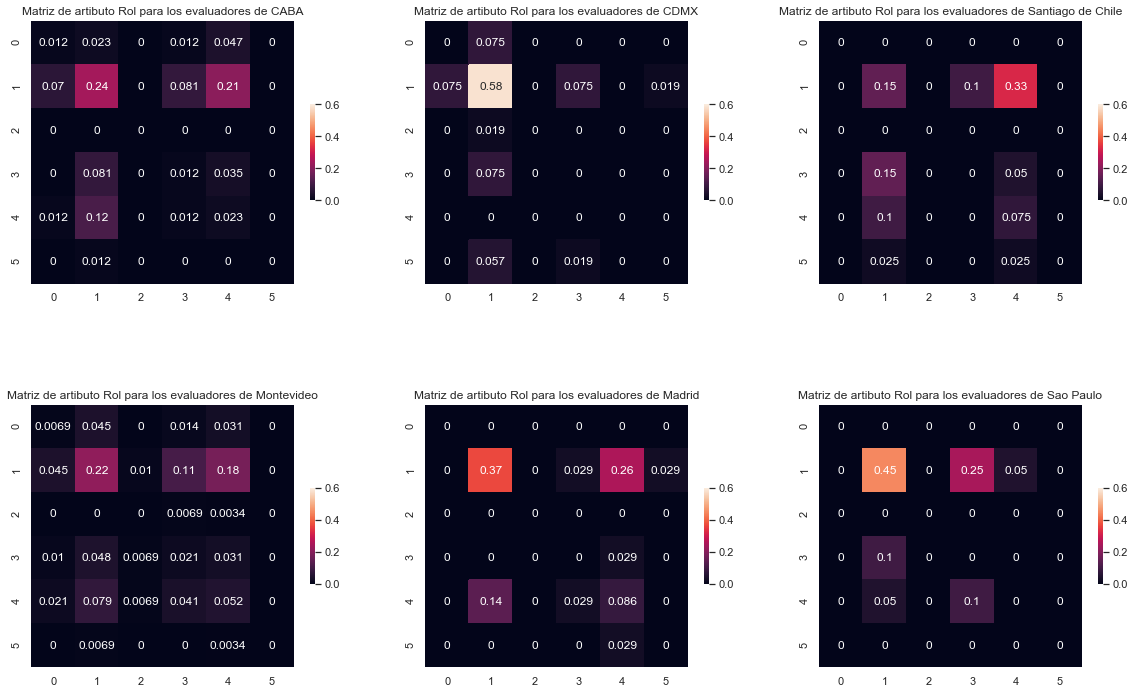

In [7]:
#-------------------------------------------------
# Attribute Mixing Matrices - Evaluators graph
#-------------------------------------------------
#       Obtenemos una matriz cuya entrada (i,j) es la fracción de aristas 
#       que van de un eje con rol i a un eje con rol j, en la red de evaluadores


#cada rol lo asignamos a un índice del 0 al 5
rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

#wach role is assigned to an index from 0 to 5
rol_map_ing={'Knowledge Generator':0,'Enabler':1,
             'Promoter':2,'Linker':3,'Articulator':4,'Community':5}

capitals={'CABA': eval_caba_G, 'CDMX':eval_cdmx_G, 'Santiago de Chile': eval_scl_G, 
          'Montevideo': eval_mtv_G, 'Madrid': eval_mad_G, 'Sao Paulo': eval_sao_G}

#aquí vamos a almacenar las matrices
attr_mix_matrices = capitals 

#conseguimos cada una de las attribute mixing matrices
for capital_str in capitals.keys():
    if capital_str=='Montevideo':
        print('Matriz de artibuto Rol para los evaluadores de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals[capital_str],'rol',mapping=rol_map_ing)
        print(M)
        print('')
        print('')
    else:
        print('Matriz de artibuto Rol para los evaluadores de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals[capital_str],'rol',mapping=rol_map_esp)
        print(M)
        print('')
        print('')
    attr_mix_matrices[capital_str] = M

            
# Creamos la instancia de una figura, con subplots
fig = plt.figure(figsize = (20,20)) # ancho x alto
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Matriz de artibuto Rol para los evaluadores de CABA')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Matriz de artibuto Rol para los evaluadores de CDMX')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Matriz de artibuto Rol para los evaluadores de Santiago de Chile')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Matriz de artibuto Rol para los evaluadores de Montevideo')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Matriz de artibuto Rol para los evaluadores de Madrid')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Matriz de artibuto Rol para los evaluadores de Sao Paulo')


# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=attr_mix_matrices['CABA'], ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['CDMX'], ax=ax2, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Santiago de Chile'], ax=ax3, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Montevideo'], ax=ax4, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Madrid'], ax=ax5, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      
sns.heatmap(data=attr_mix_matrices['Sao Paulo'], ax=ax6, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      


#fig
        

### Part 5: Construction of GraphMLs

In this part we turn every subgraph from the evaluators into a `.graphml` file.  

In [8]:
#----------------------
# Evaluators GraphMLs
#----------------------
#    Ahora, convertimos cada uno de los subgrafos correspondientes 
#    a los evaluadores que obtuvimos en un archivo .graphml

nx.write_graphml(eval_caba_G,'Ecosystems_from_GED/Gephi_evaluadores/CABA eval graph.graphml')
nx.write_graphml(eval_cdmx_G,'Ecosystems_from_GED/Gephi_evaluadores/CDMX eval graph.graphml')
nx.write_graphml(eval_scl_G,'Ecosystems_from_GED/Gephi_evaluadores/Scl eval graph.graphml')
nx.write_graphml(eval_mad_G,'Ecosystems_from_GED/Gephi_evaluadores/Mad eval graph.graphml')
nx.write_graphml(eval_mtv_G,'Ecosystems_from_GED/Gephi_evaluadores/Mtv eval graph.graphml')
nx.write_graphml(eval_sao_G,'Ecosystems_from_GED/Gephi_evaluadores/Sao eval graph.graphml')

### Part 6: Beginning of Global Metrics Analysis

In this part we compose a pandas DataFrame providing the information of each of the evaluators, and later on begin an analysis to understand the centralities of each of these evaluators. Another metrc specific to the graphs egenrated by our measuring instrument is `node weight`. 

In [9]:
#---------------------------------
# Evaluators DataFrame
#---------------------------------
#   Nos vamos a enfocar en aquellas organizacionas evaluadoras;
#   por lo tanto, restringimos nuestros DataFrames de la siguiente manera.
#   above_35 = titanic[titanic["Age"] > 35]

eval_caba_nd = caba_nd[caba_nd['Label'].isin(set(eval_caba_csv['Label']))]
eval_cdmx_nd = cdmx_nd[cdmx_nd['Label'].isin(set(eval_cdmx_csv['Label']))]
eval_scl_nd = scl_nd[scl_nd['Label'].isin(set(eval_scl_csv['Label']))]
eval_mtv_nd = mtv_nd[mtv_nd['Label'].isin(set(eval_mtv_csv['Label']))]
eval_mad_nd = mad_nd[mad_nd['Label'].isin(set(eval_mad_csv['Label']))]
eval_sao_nd = sao_nd[sao_nd['Label'].isin(set(eval_sao_csv['Label']))]


In [10]:
#----------------------------
# Averaging
#----------------------------
#     Para cada una de redes de evaluadores en las capitales, obtenemos pandas.core.series.Series, 
#     utilizando la función mean(), obteniendo promedios de centralidades

capitals_stats={'CABA': eval_caba_nd, 'CDMX':eval_cdmx_nd, 'Santiago de Chile': eval_scl_nd, 
                'Montevideo': eval_mtv_nd, 'Madrid': eval_mad_nd, 'Sao Paulo': eval_sao_nd}


averages={city: stats.mean() for city,stats in capitals_stats.items()}
#averages['Sao Paulo']

In [11]:
countries={'Montevideo':'Uruguay', 'CABA':'Argentina', 'CDMX':'México',
          'Madrid':'España', 'Sao Paulo': 'Brasil', 'Santiago de Chile': 'Chile'}


list_concat=[]
for city,avg in averages.items():
    datafr=avg.copy().to_frame().T
    
    #drop the following attributes
    datafr.drop(['timeset', 'componentnumber'], axis=1, inplace=True)
    if 'type' in datafr.columns:
        datafr.drop(['type'], axis=1, inplace=True)
    
    #add to list of concatenated
    list_concat.append(datafr)
    
    #add country and city name attribute
    datafr.insert(0, 'País', [countries[city]], True) 
    datafr.insert(0, 'Ciudad', [city], True) 

df_concat=pd.concat(list_concat, ignore_index=True)
pd.set_option('display.max_columns', None)
df_concat

,Ciudad,País,mentions,avg strength,weight,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,Authority,Hub,strongcompnum,clustering,triangles,eigencentrality,ego,pageranks,node size
0,CABA,Argentina,4.161290,3.161060,2.658065,5.419355,12.838710,18.258065,17.225806,41.709677,58.935484,4.129032,0.381825,0.423175,1671.513279,5.838710,0.133627,0.133626,129.354839,0.093740,13.161290,0.332615,NaN,NaN,NaN
1,CDMX,México,NaN,3.141293,1.883333,3.972222,12.388889,16.361111,13.805556,43.888889,57.694444,4.972222,0.320198,0.359988,2550.599097,4.500000,NaN,NaN,158.944444,0.047973,4.361111,0.342879,NaN,NaN,NaN
2,Santiago de Chile,Chile,4.160000,3.163579,2.968000,5.400000,12.400000,17.800000,20.240000,43.080000,63.320000,4.400000,0.395414,0.438158,1520.518740,4.200000,0.144491,0.144495,NaN,0.106122,12.320000,0.264458,1.0,0.015488,NaN
3,Montevideo,Uruguay,8.500000,3.190034,NaN,9.583333,13.520833,23.104167,32.125000,46.187500,78.312500,3.875000,0.408587,0.455730,799.193202,2.437500,NaN,NaN,83.604167,0.215201,38.770833,0.314350,NaN,NaN,5.854167
4,Madrid,España,2.945946,3.209347,1.913514,5.378378,8.540541,13.918919,17.054054,30.459459,47.513514,5.432432,0.323354,0.365145,1665.811850,5.567568,NaN,NaN,103.297297,0.077790,5.891892,0.192000,NaN,NaN,NaN
5,Sao Paulo,Brasil,2.172414,3.171264,1.434483,3.172414,9.793103,12.965517,11.000000,34.655172,45.655172,5.965517,0.284818,0.333899,1705.843099,6.413793,0.117647,0.117646,112.379310,0.077852,4.482759,0.422570,NaN,NaN,NaN


In [12]:
sum(list(df_concat.isnull().sum()))

24

In [13]:
# Remove averages which don't describe global graph metrics

df_concat=df_concat.drop('closnesscentrality',axis=1)
df_concat=df_concat.drop('harmonicclosnesscentrality',axis=1)
df_concat=df_concat.drop('modularity_class',axis=1)
df_concat=df_concat.drop('triangles',axis=1)
df_concat=df_concat.drop('eigencentrality',axis=1)
df_concat=df_concat.drop('pageranks',axis=1)
df_concat=df_concat.drop('ego',axis=1)
df_concat=df_concat.drop('betweenesscentrality',axis=1)
df_concat=df_concat.drop('Hub',axis=1)

In [14]:
# more fixtures
df_concat['weight'][3] = df_concat['node size'][3]
df_concat = df_concat.drop('node size',axis=1)
df_concat = df_concat.drop('strongcompnum',axis=1)
df_concat = df_concat.drop('Authority',axis=1)

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_concat

,Ciudad,País,mentions,avg strength,weight,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,clustering
0,CABA,Argentina,4.161290,3.161060,2.658065,5.419355,12.838710,18.258065,17.225806,41.709677,58.935484,4.129032,0.093740
1,CDMX,México,NaN,3.141293,1.883333,3.972222,12.388889,16.361111,13.805556,43.888889,57.694444,4.972222,0.047973
2,Santiago de Chile,Chile,4.160000,3.163579,2.968000,5.400000,12.400000,17.800000,20.240000,43.080000,63.320000,4.400000,0.106122
3,Montevideo,Uruguay,8.500000,3.190034,5.854167,9.583333,13.520833,23.104167,32.125000,46.187500,78.312500,3.875000,0.215201
4,Madrid,España,2.945946,3.209347,1.913514,5.378378,8.540541,13.918919,17.054054,30.459459,47.513514,5.432432,0.077790
5,Sao Paulo,Brasil,2.172414,3.171264,1.434483,3.172414,9.793103,12.965517,11.000000,34.655172,45.655172,5.965517,0.077852


Global characteristics we may compute:

* Diameter  
* Radius
* *Average path length*
* *Transitivity*
* Global Efficiency
* **Modularity**
* Assortativity Coefficient
* **Small Worldness**


Metrics in normal font have been computed already, and are not defined / infinite when the network is considered undirected. Metric in italics are computed for undirected graphs, but are also defined for directed graphs. Metrics in black font were computed manually. 



In [19]:
#--------------
# Diameter
#--------------
capitals={'CABA': eval_caba_G, 'CDMX':eval_cdmx_G, 'Santiago de Chile': eval_scl_G, 
          'Montevideo': eval_mtv_G, 'Madrid': eval_mad_G, 'Sao Paulo': eval_sao_G}

print('-------------------------------------------')
print('Diámetro en Grafos de evaluadores dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.diameter(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------')
print('Diámetro en Grafos de evaluadores no dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.diameter(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')    


-------------------------------------------
Diámetro en Grafos de evaluadores dirigidos
-------------------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

-------------------------------------------
Diámetro en Grafos de evaluadores no dirigidos
-------------------------------------------
CABA: 4

CDMX: inf

Santiago de Chile: inf

Montevideo: 4

Madrid: inf

Sao Paulo: inf



In [20]:
#--------------
# Radius
#--------------

print('-------------------------------------------')
print('Radio en Grafos de evaluadores dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.radius(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------')
print('Radio en Grafos de evaluadores no dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.radius(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

-------------------------------------------
Radio en Grafos de evaluadores dirigidos
-------------------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

-------------------------------------------
Radio en Grafos de evaluadores no dirigidos
-------------------------------------------
CABA: 2

CDMX: inf

Santiago de Chile: inf

Montevideo: 2

Madrid: inf

Sao Paulo: inf



In [21]:
#---------------------------------
# Camino más corto promedio
#---------------------------------

# parece que aunque las graficas dirigidas no sean conexas, el camino 
# más corto promedio si se está pudiendo computar, y nos da un resultado.. menor?

print('-------------------------------------------')
print('Camino más corto promedio en Grafos de evaluadores dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.average_shortest_path_length(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------')
print('Camino más corto promedio en Grafos de evaluadores dirigidos')
print('-------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.average_shortest_path_length(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')       


-------------------------------------------
Camino más corto promedio en Grafos de evaluadores dirigidos
-------------------------------------------
CABA: 1.903225806451613

CDMX: inf

Santiago de Chile: inf

Montevideo: 2.0593971631205674

Madrid: inf

Sao Paulo: inf

-------------------------------------------
Camino más corto promedio en Grafos de evaluadores dirigidos
-------------------------------------------
CABA: 2.0408602150537636

CDMX: inf

Santiago de Chile: inf

Montevideo: 1.8927304964539007

Madrid: inf

Sao Paulo: inf



In [22]:
#---------------------------------
# Transitividad
#---------------------------------

# parece que aunque las graficas dirigidas no sean conexas, el camino 
# más corto promedio si se está pudiendo computar, y nos da un resultado.. menor?
print('----------------------------------')
print('Transitividad en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.transitivity(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Transitividad en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.transitivity(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Transitividad en Grafos de evaluadores dirigidos
----------------------------------
CABA: 0.2733812949640288

CDMX: 0.08620689655172414

Santiago de Chile: 0.3310810810810811

Montevideo: 0.33746283448959363

Madrid: 0.16666666666666666

Sao Paulo: 0.17857142857142858

----------------------------------
Transitividad en Grafos de evaluadores dirigidos
----------------------------------
CABA: 0.2753623188405797

CDMX: 0.13872832369942195

Santiago de Chile: 0.2741514360313316

Montevideo: 0.36394849785407724

Madrid: 0.1969111969111969

Sao Paulo: 0.2571428571428571



In [23]:
#-----------------------
# Eficiencia Global
#-----------------------
# Solo esta definida para las versiones no dirigidas de nuestras redes

print('----------------------------------')
print('Eficiencia Global en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.global_efficiency(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Eficiencia Global en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.global_efficiency(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Eficiencia Global en Grafos de evaluadores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

----------------------------------
Eficiencia Global en Grafos de evaluadores dirigidos
----------------------------------
CABA: 0.5492831541218623

CDMX: 0.26542328042327973

Santiago de Chile: 0.5383333333333329

Montevideo: 0.5900561465721038

Madrid: 0.3465215215215196

Sao Paulo: 0.12222222222222223



In [24]:
#-------------------
# Modularidad
#-------------------

#modularidad Parece no estar definido en este esquema, pero podemos obtener esta medida de Gephi

print('----------------------------------')
print('Modularidad en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.community.modularity(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Modularidad en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.community.modularity(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Modularidad en Grafos de evaluadores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

----------------------------------
Modularidad en Grafos de evaluadores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf



In [25]:
#---------------------------
# Assortativity coefficient
#---------------------------

print('----------------------------------')
print('Coef. Asortatividad en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.degree_assortativity_coefficient(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Coef. Asortatividad en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.degree_assortativity_coefficient(nx.to_undirected(graph))))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Coef. Asortatividad en Grafos de evaluadores dirigidos
----------------------------------
CABA: -0.30954538575652907

CDMX: 0.04545466486296276

Santiago de Chile: -0.3451606412374744

Montevideo: -0.1822938029410136

Madrid: -0.10109504805503373

Sao Paulo: -0.12374219943053284

----------------------------------
Coef. Asortatividad en Grafos de evaluadores dirigidos
----------------------------------
CABA: -0.3650420187643047

CDMX: 0.09923429851616565

Santiago de Chile: -0.3675601398203708

Montevideo: -0.2623385480879436

Madrid: -0.11673160364827867

Sao Paulo: -0.07374631268436647



In [26]:
#------------------
# Small Worldness
#------------------

#networkx.algorithms.smallworld.random_reference
print('----------------------------------')
print('Small Worldness en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.algorithms.smallworld.sigma(graph,niter=1,nrand=2)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Small Worldness en Grafos de evaluadores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.algorithms.smallworld.sigma(graph.to_undirected(),niter=1,nrand=2)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

----------------------------------
Small Worldness en Grafos de evaluadores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

----------------------------------
Small Worldness en Grafos de evaluadores dirigidos
----------------------------------
CABA: 1.0524840247097378

CDMX: inf

Santiago de Chile: inf

Montevideo: 1.0141833973761396

Madrid: inf

Sao Paulo: inf



In [27]:
capitals={'CABA': eval_caba_G, 'CDMX':eval_cdmx_G, 'Santiago de Chile': eval_scl_G, 
          'Montevideo': eval_mtv_G, 'Madrid': eval_mad_G, 'Sao Paulo': eval_sao_G}

#las columnas que vamos a agregar al DataFrame

diameter = [0]*len(capitals)
radius = [0]*len(capitals)
avg_shortest_path_length = [0]*len(capitals)
transitivity = [0]*len(capitals)
global_efficiency = [0]*len(capitals)
modularity = [0]*len(capitals)
small_worldness = [0]*len(capitals)
deg_assortativity_coefficient = [0]*len(capitals)


for city, graph in capitals.items():
    city_index=df_concat.index[df_concat['Ciudad']==city].tolist()[0]
    
    #conseguimos cada parámetro para esta ciudad
    undirected=nx.to_undirected(graph)
    
    try: diameter[city_index] = nx.diameter(undirected)
    except: diameter[city_index] = float('inf')
    
    try: radius[city_index] = nx.radius(undirected)
    except: radius[city_index] = float('inf')
            
    try: avg_shortest_path_length[city_index] = nx.average_shortest_path_length(undirected)
    except: avg_shortest_path_length[city_index] = float('inf')
        
    try: transitivity[city_index] = nx.transitivity(undirected)
    except: transitivity[city_index] = float('inf')
        
    try: global_efficiency[city_index] = nx.global_efficiency(undirected)
    except: global_efficiency[city_index] = float('inf')
        
    try: small_worldness[city_index] = nx.algorithms.smallworld.sigma(graph.to_undirected(),niter=1,nrand=5)
    except: small_worldness[city_index] = float('inf')
    
    try: deg_assortativity_coefficient[city_index] = nx.degree_assortativity_coefficient(undirected)
    except: deg_assortativity_coefficient[city_index] = float('inf')
    
df_concat['Diámetro'] = diameter
df_concat['Radio'] = radius
df_concat['Camino más corto promedio'] = avg_shortest_path_length
df_concat['Transitividad'] = transitivity
df_concat['Eficiencia Global'] = global_efficiency
df_concat['Small Worldness']= small_worldness
df_concat['Coeficiente de Asortatividad de Grado'] = deg_assortativity_coefficient

df_concat

,Ciudad,País,mentions,avg strength,weight,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Coeficiente de Asortatividad de Grado
0,CABA,Argentina,4.161290,3.161060,2.658065,5.419355,12.838710,18.258065,17.225806,41.709677,58.935484,4.129032,0.093740,4.0,2.0,2.04086,0.275362,0.549283,1.015304,-0.365042
1,CDMX,México,NaN,3.141293,1.883333,3.972222,12.388889,16.361111,13.805556,43.888889,57.694444,4.972222,0.047973,inf,inf,inf,0.138728,0.265423,inf,0.099234
2,Santiago de Chile,Chile,4.160000,3.163579,2.968000,5.400000,12.400000,17.800000,20.240000,43.080000,63.320000,4.400000,0.106122,inf,inf,inf,0.274151,0.538333,inf,-0.367560
3,Montevideo,Uruguay,8.500000,3.190034,5.854167,9.583333,13.520833,23.104167,32.125000,46.187500,78.312500,3.875000,0.215201,4.0,2.0,1.89273,0.363948,0.590056,0.987812,-0.262339
4,Madrid,España,2.945946,3.209347,1.913514,5.378378,8.540541,13.918919,17.054054,30.459459,47.513514,5.432432,0.077790,inf,inf,inf,0.196911,0.346522,inf,-0.116732
5,Sao Paulo,Brasil,2.172414,3.171264,1.434483,3.172414,9.793103,12.965517,11.000000,34.655172,45.655172,5.965517,0.077852,inf,inf,inf,0.257143,0.122222,inf,-0.073746


In [28]:
#-----------------
#  Modularidades
#-----------------
#     Estas medidas fueron tomadas no por medio de este programa, sino manualmente desde el programa Gephi
#     Metodología:
#        Tomamos tres medidas en cada red, con cada una de las resoluciones 0.8, 1.0, 1.2, con o sin ejes
#
#        Network       (CABA, CDMX, MAD, MTV SAO, SCL)
#        Resolution    (0.8, 1.0, 1.2)  
#        Edge weights  (Y/N)
#        
#        Y luego de ello tomamos la mediana de las tres medidas de resolución, a modo de tomar en cuenta variabilidad




df_concat['Modularidad con pesos (0.8)'] = [0.255, 0.423, 0.245, 0.183, 0.435, 0.424]
df_concat['Modularidad con pesos (1.0)'] = [0.270, 0.429, 0.227, 0.183, 0.431, 0.489]
df_concat['Modularidad con pesos (1.2)'] = [0.272, 0.428, 0.225, 0.176, 0.422, 0.443]


df_concat['Modularidad sin pesos (0.8)'] = [0.247, 0.424, 0.248, 0.174, 0.437, 0.443]
df_concat['Modularidad sin pesos (1.0)'] = [0.270, 0.422, 0.227, 0.185, 0.412, 0.489]
df_concat['Modularidad sin pesos (1.2)'] = [0.270, 0.427, 0.221, 0.158, 0.416, 0.489]

df_concat

,Ciudad,País,mentions,avg strength,weight,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Coeficiente de Asortatividad de Grado,Modularidad con pesos (0.8),Modularidad con pesos (1.0),Modularidad con pesos (1.2),Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2)
0,CABA,Argentina,4.161290,3.161060,2.658065,5.419355,12.838710,18.258065,17.225806,41.709677,58.935484,4.129032,0.093740,4.0,2.0,2.04086,0.275362,0.549283,1.015304,-0.365042,0.255,0.270,0.272,0.247,0.270,0.270
1,CDMX,México,NaN,3.141293,1.883333,3.972222,12.388889,16.361111,13.805556,43.888889,57.694444,4.972222,0.047973,inf,inf,inf,0.138728,0.265423,inf,0.099234,0.423,0.429,0.428,0.424,0.422,0.427
2,Santiago de Chile,Chile,4.160000,3.163579,2.968000,5.400000,12.400000,17.800000,20.240000,43.080000,63.320000,4.400000,0.106122,inf,inf,inf,0.274151,0.538333,inf,-0.367560,0.245,0.227,0.225,0.248,0.227,0.221
3,Montevideo,Uruguay,8.500000,3.190034,5.854167,9.583333,13.520833,23.104167,32.125000,46.187500,78.312500,3.875000,0.215201,4.0,2.0,1.89273,0.363948,0.590056,0.987812,-0.262339,0.183,0.183,0.176,0.174,0.185,0.158
4,Madrid,España,2.945946,3.209347,1.913514,5.378378,8.540541,13.918919,17.054054,30.459459,47.513514,5.432432,0.077790,inf,inf,inf,0.196911,0.346522,inf,-0.116732,0.435,0.431,0.422,0.437,0.412,0.416
5,Sao Paulo,Brasil,2.172414,3.171264,1.434483,3.172414,9.793103,12.965517,11.000000,34.655172,45.655172,5.965517,0.077852,inf,inf,inf,0.257143,0.122222,inf,-0.073746,0.424,0.489,0.443,0.443,0.489,0.489


In [35]:
#-------------------------
# Last details
#-------------------------
#Cambiar los nombres de los atributos del DataFrame
#algunos nombres de columnas no fueron modificados para facilitar legibilidad

df_concat.rename(columns={'mentions': 'Menciones', 'Eccentricity': 'Excentricidad', 'clustering':'Clustering'}, inplace=True)
df_concat

,Ciudad,País,Menciones,avg strength,weight,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Excentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Coeficiente de Asortatividad de Grado,Modularidad con pesos (0.8),Modularidad con pesos (1.0),Modularidad con pesos (1.2),Modularidad sin pesos (0.8),Modularidad sin pesos (1.0),Modularidad sin pesos (1.2)
0,CABA,Argentina,4.161290,3.161060,2.658065,5.419355,12.838710,18.258065,17.225806,41.709677,58.935484,4.129032,0.093740,4.0,2.0,2.04086,0.275362,0.549283,1.015304,-0.365042,0.255,0.270,0.272,0.247,0.270,0.270
1,CDMX,México,NaN,3.141293,1.883333,3.972222,12.388889,16.361111,13.805556,43.888889,57.694444,4.972222,0.047973,inf,inf,inf,0.138728,0.265423,inf,0.099234,0.423,0.429,0.428,0.424,0.422,0.427
2,Santiago de Chile,Chile,4.160000,3.163579,2.968000,5.400000,12.400000,17.800000,20.240000,43.080000,63.320000,4.400000,0.106122,inf,inf,inf,0.274151,0.538333,inf,-0.367560,0.245,0.227,0.225,0.248,0.227,0.221
3,Montevideo,Uruguay,8.500000,3.190034,5.854167,9.583333,13.520833,23.104167,32.125000,46.187500,78.312500,3.875000,0.215201,4.0,2.0,1.89273,0.363948,0.590056,0.987812,-0.262339,0.183,0.183,0.176,0.174,0.185,0.158
4,Madrid,España,2.945946,3.209347,1.913514,5.378378,8.540541,13.918919,17.054054,30.459459,47.513514,5.432432,0.077790,inf,inf,inf,0.196911,0.346522,inf,-0.116732,0.435,0.431,0.422,0.437,0.412,0.416
5,Sao Paulo,Brasil,2.172414,3.171264,1.434483,3.172414,9.793103,12.965517,11.000000,34.655172,45.655172,5.965517,0.077852,inf,inf,inf,0.257143,0.122222,inf,-0.073746,0.424,0.489,0.443,0.443,0.489,0.489


In [32]:
df_concat.to_csv('Referenced_CSVs/Tidy_DataFrame_Evaluadores.csv',index=False)